<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Multi_LR_IRIS-MOD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import libraries
import numpy as np
import pandas as pd
import sklearn.datasets  # to import iris
import matplotlib.pyplot as plt  # %matplotlib inline # this line şs for jupyter notebooks



In [23]:

#load data as numpy array using genfromtxt
train_data = pd.read_csv('https://drive.google.com/uc?id=1vJwVLSGvbSK1kE8n2RNifUxCVMWu6PmY', delimiter=',')
train_data.head()
rows = train_data.shape[0]
cols = train_data.shape[1]
scores = train_data[['x1', 'x2']].values
results = train_data['y'].values
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)
m_train=X.shape[0]
print(m_train)

(100, 3)
(100, 1)
100


In [24]:
train_data.head()

,x1,x2,y
0,22.63,61.39,0
1,99.38,27.28,1
2,94.32,66.42,2
3,23.43,40.44,0
4,98.36,8.14,1


In [31]:
#load test data as numpy array using genfromtxt
test_data = pd.read_csv('https://drive.google.com/uc?id=1j4euqcEGkQfVZEzNOA0_3qblEI9vx6Hp')
#no of test samples
rows_test = test_data.shape[0]
cols_test = test_data.shape[1]
scores_test = test_data[['x1', 'x2']].values
results_test = test_data['y'].values
mean_scores_test = np.mean(scores_test, axis=0)
std_scores_test = np.std(scores_test, axis=0)
scores_test = (scores_test - mean_scores_test) / std_scores_test
test_X = np.append(np.ones((rows_test, 1)), scores_test, axis=1) #include intercept
test_y = results_test.reshape(rows_test, 1)
test_m =test_X.shape[0]

print(test_X.shape)
print(test_y.shape)
print(test_m)


(10, 3)
(10, 1)
10


In [ ]:
#predict
pred = np.zeros((test_m,3))
model_predict = sigmoid(np.dot(test_X, theta.T))
pred[model_predict > 0.5] = 1
#converting the prediction matrix into vectors
predict = np.zeros((test_m,1))
predict[pred[:,1] == 1] = 1
predict[pred[:,2] == 1] = 2

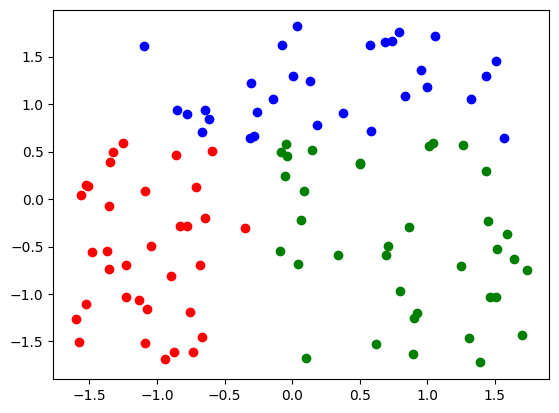

In [30]:

colors = ['r', 'g', 'b']
for c in np.unique(y):
    plt.plot(scores[results== c, 0], scores[results == c, 1], 'o', color=colors[int(c)])
# also print our test datapoint



In [41]:
y1=y.flatten()
y1=np.sort(y1)
y=y1
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [47]:
 # model for class 0
y_0 = np.copy(y)
y_0[y == 2] = 1.0 # Fixed: flatten y for consistent indexing
y_0 = y_0 - 1.0
y_0 = abs(y_0 * -1.0)

In [46]:
print(y_0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [48]:
# model for class 1
y_1 = np.copy(y)
y_1[y == 2] = 1
y_1[y == 2] = 0

In [49]:
print(y_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [50]:
# model for class 2
y_2 = np.copy(y)
y_2[y == 1] = 0
y_2[y  == 2] = 1


In [51]:
print(y_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [52]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [53]:

# define cost function
# J(theta) = 1/m (-y^T log(h) - (1-y)^T log(1-h) )
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)) / y.size

In [72]:

def predict(X, theta):
    z = np.dot(np.transpose(X), theta)
    return sigmoid(z)

In [75]:
def grad_desc(X, y, alpha, num_iter):
    # run gradient descent to adjust theta
    #  1. Calculate gradient average
    #  2. Multiply by learning rate alpha
    #  3. Subtract from weights
    # init weights - i choose all to be zero initially for consistent results
    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta = theta - alpha * gradient

       # if( i % 50000 == 0):
            #calc_loss = cost(h, y)
             #print('iter num: ', i, 'cost : ', calc_loss.mean(), 'theta: ', theta)

    print('iter num: ', i, 'cost : ', cost(h, y).mean(), 'theta: ', theta)

    return theta


In [68]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(iteraciones):
      h = predict(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)
  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [76]:
# logistic regression parameters
num_iter = 2500000
alpha = 0.001
epsilon = 1e-6

In [70]:
theta = np.zeros((cols , 1))

In [77]:
theta_0,costs = gradiente(X, y_0,theta, alpha, num_iter,epsilon)

ValueError: shapes (3,100) and (3,1) not aligned: 100 (dim 1) != 3 (dim 0)

In [78]:

theta_0 = grad_desc(X, y_0, alpha, num_iter)
theta_1 = grad_desc(X, y_1, alpha, num_iter)
theta_2 = grad_desc(X, y_2, alpha, num_iter)

iter num:  2499999 cost :  0.0054321289619062366 theta:  [-0.81156678  1.02996446 -0.12241617]
iter num:  2499999 cost :  0.006526676309799013 theta:  [-0.57628773 -0.08153432  0.01241932]
iter num:  2499999 cost :  0.005191562237118142 theta:  [-1.08419408 -1.10647567  0.25259696]


In [79]:
print(theta_0)
print(theta_1)
print(theta_2)

[-0.81156678  1.02996446 -0.12241617]
[-0.57628773 -0.08153432  0.01241932]
[-1.08419408 -1.10647567  0.25259696]


print(theta_0)
print(theta_1)
print(*theta_2*)

In [ ]:
Xt = np.array([6.4, 2.8, 5.6, 2.2])
Xt = np.concatenate(([1], Xt))

In [ ]:
Xt.shape

(5,)

In [ ]:
theta_0.shape

(5,)

In [ ]:
predict(Xt, theta_0)

np.float64(2.4222634707592633e-11)

In [ ]:
    # use i th model to decide for c_i

preds = np.zeros(len(np.unique(y)))
preds[0] = predict(Xt, theta_0)
preds[1] = predict(Xt, theta_1)
preds[2] = predict(Xt, theta_2)
    # use i th model to decide for c_i

preds = np.zeros(len(np.unique(y)))
preds[0] = predict(Xt, theta_0)
preds[1] = predict(Xt, theta_1)
preds[2] = predict(Xt, theta_2)

print("class 0 P = ", preds[0])
print("class 1 P = ", preds[1])
print("class 2 P = ", preds[2])

# choose max
max_pred_value = np.max(preds) # Use np.max to get the maximum probability value
predicted_class_indices = np.where(preds == max_pred_value)[0] # Get the index(es) of the maximum probability
predicted_class_idx = predicted_class_indices[0] # Assuming only one max, get the first index

# print result
# print("Test point ", Xt, " has label ", class_label[0], " according to logistic regression classification")
print("Test point ", Xt, " has label ", predicted_class_idx, " according to logistic regression classification")

print("which is ", iris.target_names[predicted_class_idx])

class 0 P =  2.4222634707592633e-11
class 1 P =  0.31472066177318364
class 2 P =  0.9999898226713536
Test point  [1.  6.4 2.8 5.6 2.2]  has label  2  according to logistic regression classification
which is  virginica


In [ ]:
X.shape

(150, 5)